In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pycaret
from pycaret.regression import *
from functions import MAPE, plot_train_test_errors_ridge, plot_train_test_errors_lasso
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [2]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [3]:
df = pd.read_csv('Concrete_Data.csv', header=None)
df.columns =['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
             'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


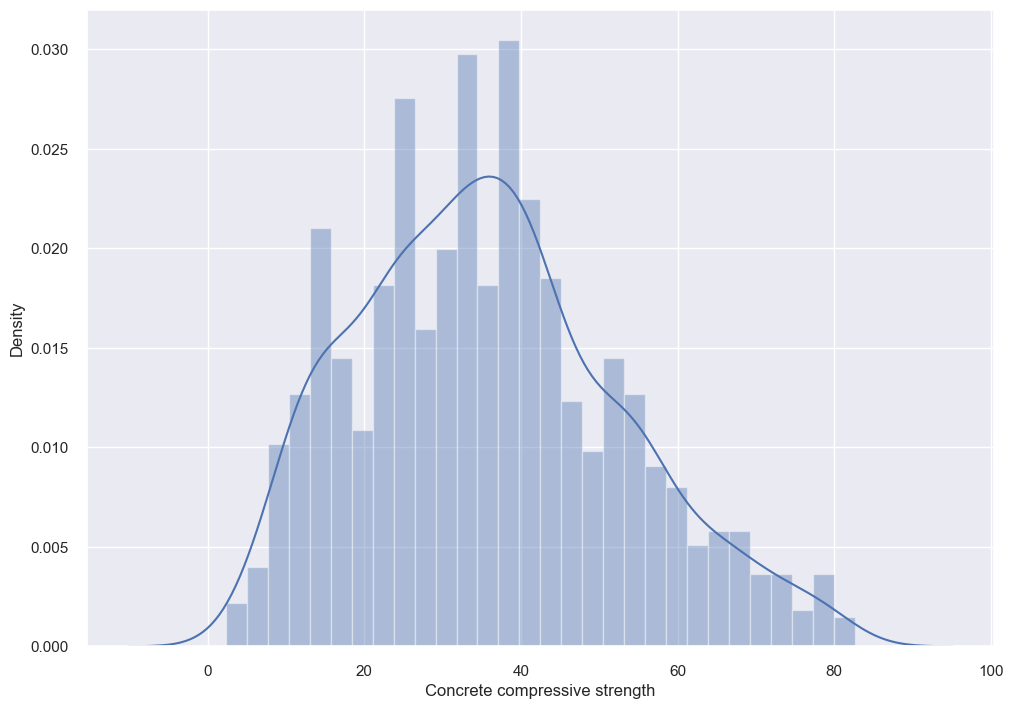

In [4]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(df['Concrete compressive strength'], bins=30)
plt.show()
# The y-axis in a density plot is the probability density function for the kernel density estimation. 

<AxesSubplot: >

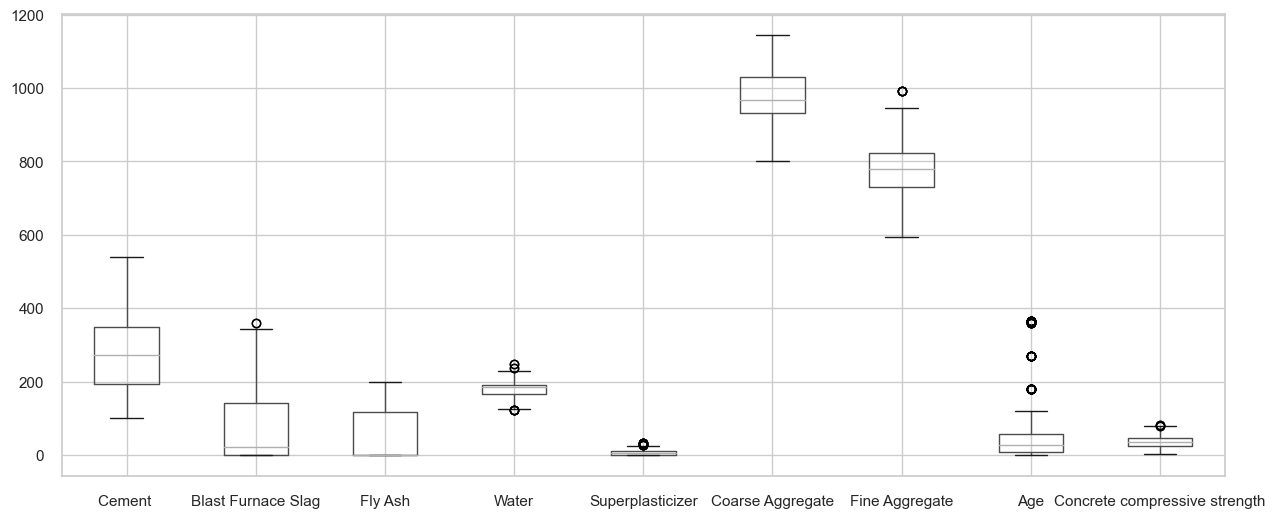

In [5]:
# box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

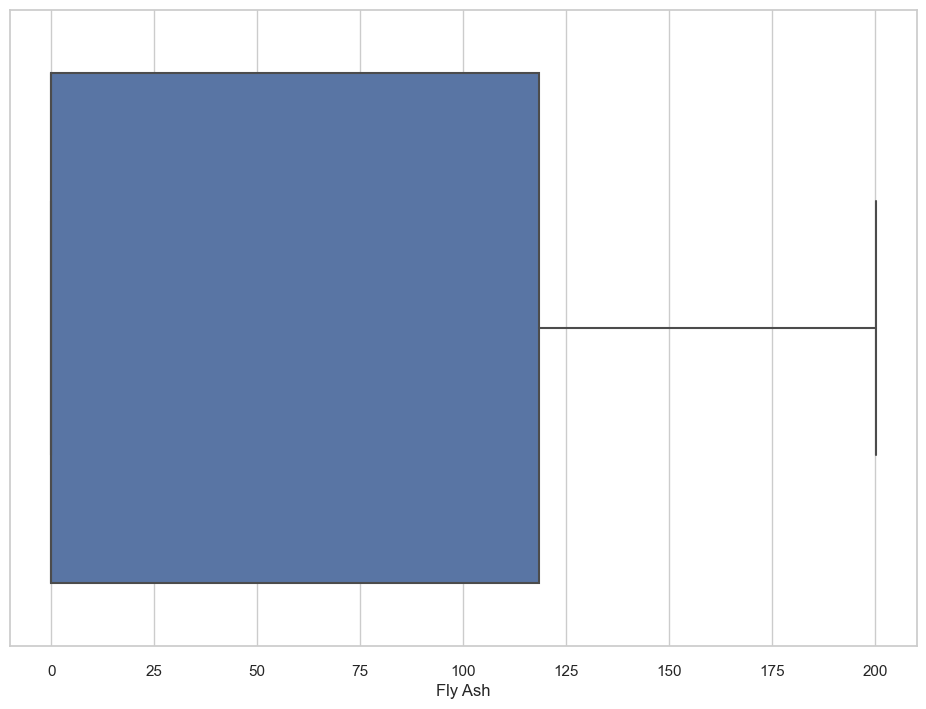

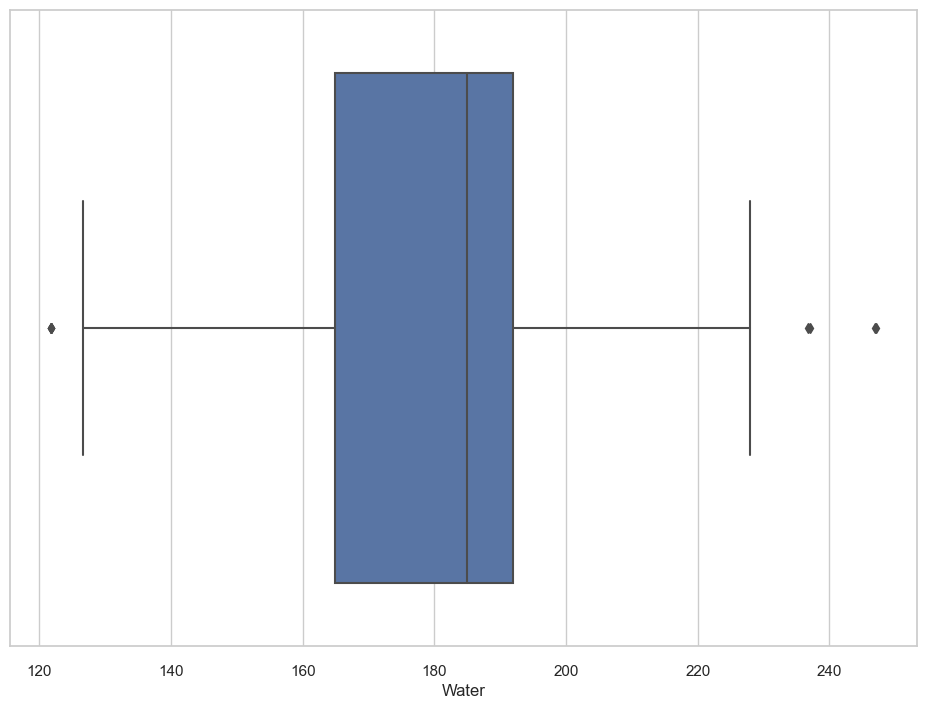

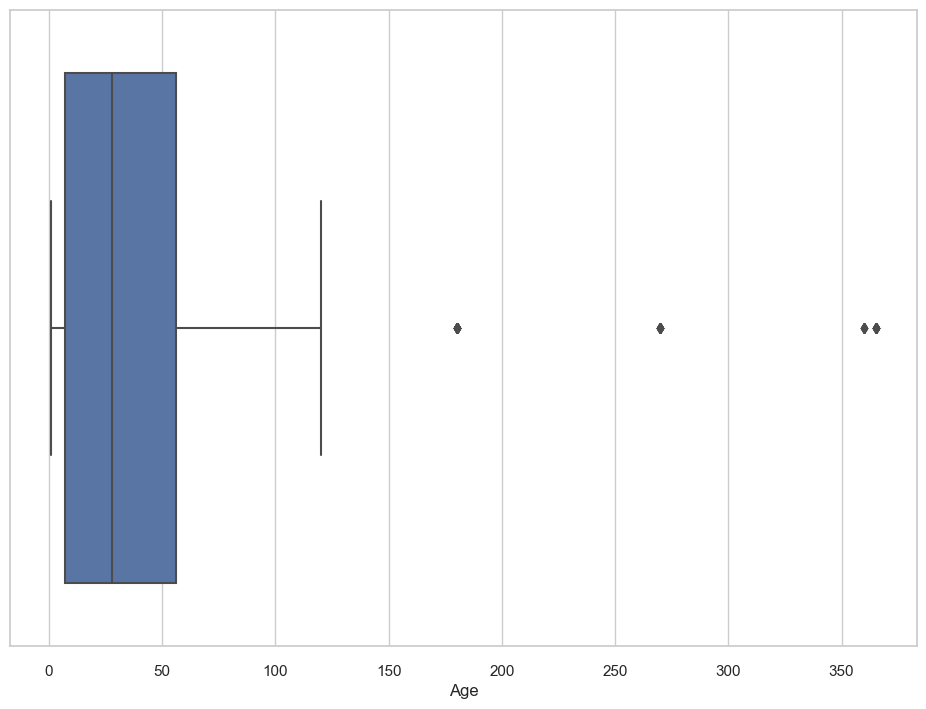

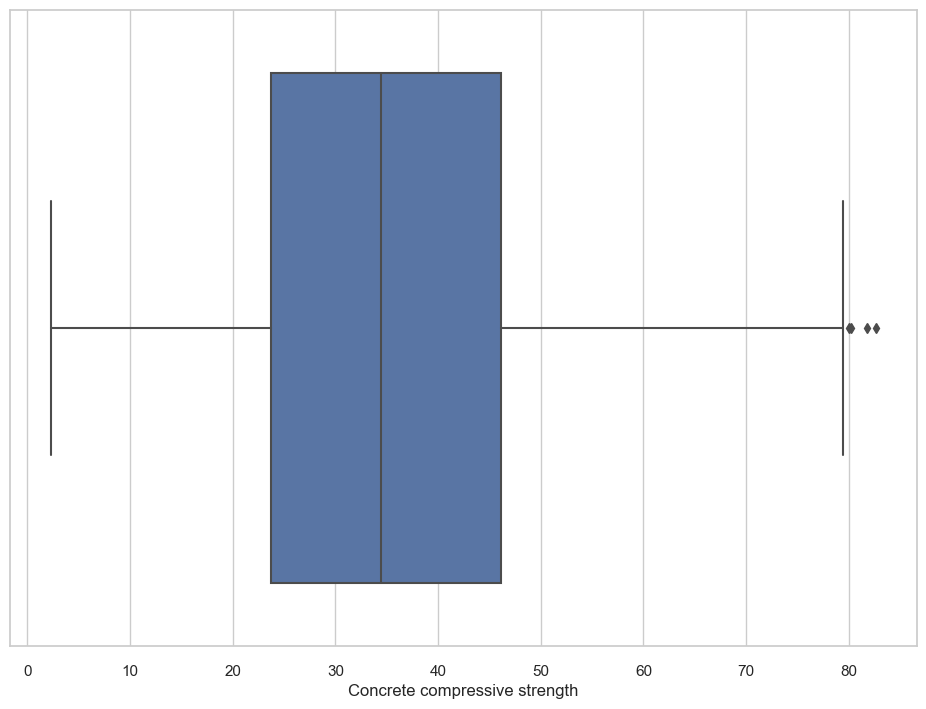

In [6]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Fly Ash'])
plt.show()
sns.boxplot(x=df['Water'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Concrete compressive strength'])
plt.show()

In [7]:
#s = setup(data = df, target = 'Concrete compressive strength', session_id=123, silent=True) 

In [8]:
#best = compare_models(sort='MSE')

In [9]:
#lasso = create_model('lasso')

In [10]:
#print(lasso)

In [11]:
#tuned_lasso = tune_model(lasso)

In [12]:
#print(tuned_lasso)

In [13]:
df.isna().sum() # no missing values in the dataframe

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

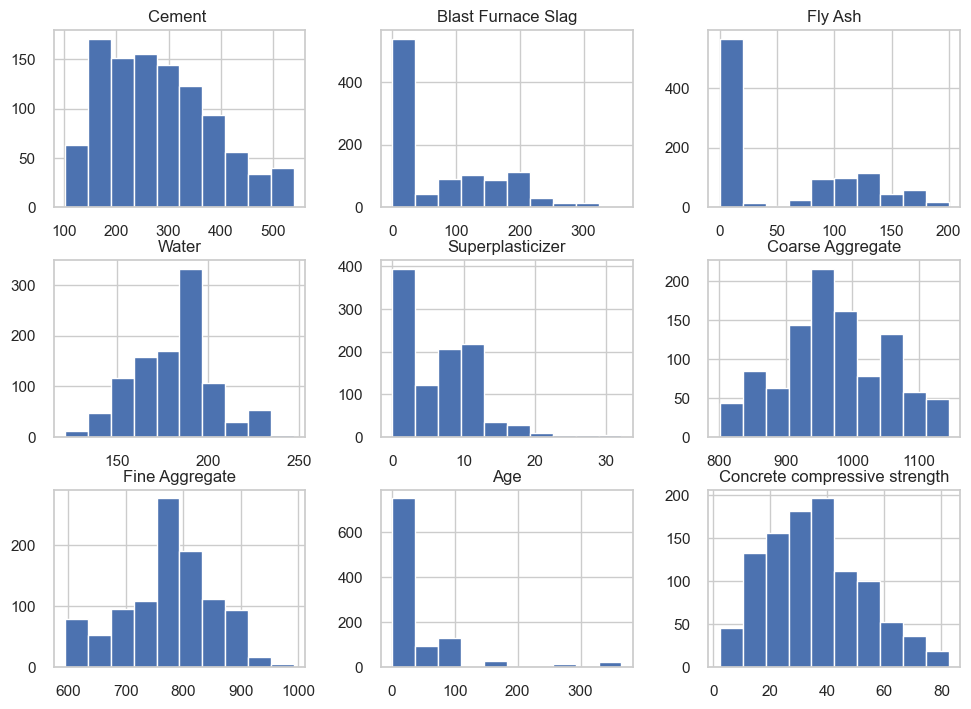

In [14]:
# visualizing the dataframe
fig, ax = plt.subplots()
df.hist(figsize=(25,25), ax=ax)
fig.savefig('visualizations/distribution_features.png')

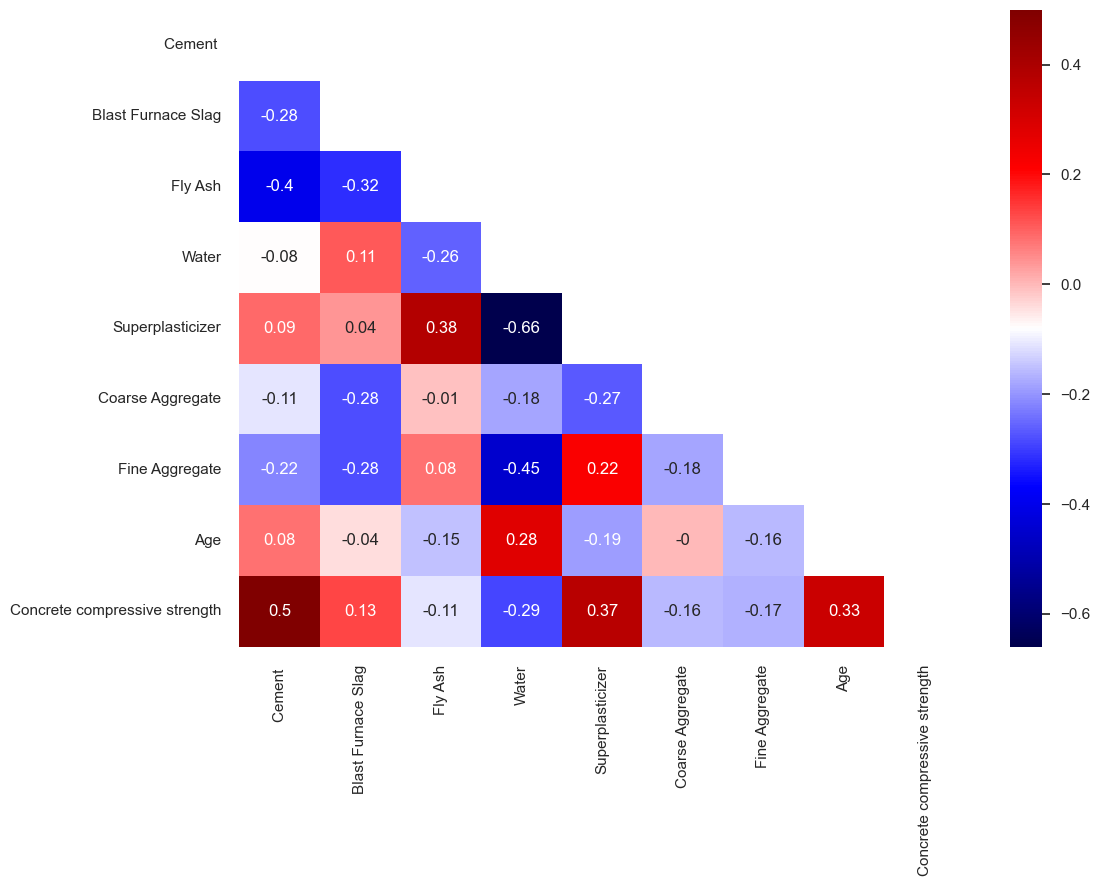

In [15]:
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)
plt.savefig("visualizations/correlation_matrix_.png",bbox_inches='tight')

In [16]:
# Splitting the data into train and test data

X = df[['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
        'Coarse Aggregate', 'Fine Aggregate', 'Age']]
y = df['Concrete compressive strength'] # the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(721,)
(309,)


The **Min-Max Scaling** uses the minimum and maximum value of a feature to rescale values within a range typically between 0 to 1 or -1 to 1. The shape of the distribution doesn’t change. 

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

--------------------------
The **Mean Squared Error (MSE)** is a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{2}^{2}.
$$

The **Mean Absolute Error (MAE)** is a risk metric corresponding to the expected value of the absolute error loss and it is defined as 

$$
MAE = \frac{1}{N}|| \textbf{y} - \hat{\textbf{y}} ||_{1}.
$$

The **Mean Absolute Percentage Error (MAPE)** expresses the accuracy as a ratio defined by the formula

$$
MAPE = \frac{1}{N} \sum_{i=1}^{N} |\frac{y(i)-\hat{y}(i)}{y(i)}| .
$$

---------------------
# Ordinary Least Squares regression (OLS) 

In [18]:
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_train_pred = ols.predict(X_train_scaled)
y_test_pred = ols.predict(X_test_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, y_train_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, y_train_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, y_train_pred))
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.24
Mean absolute error (MAE): 8.18
Mean Absolute Percentage Error (MAPE): 31.39
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.75
Mean absolute error (MAE): 8.30
Mean Absolute Percentage Error (MAPE): 32.19


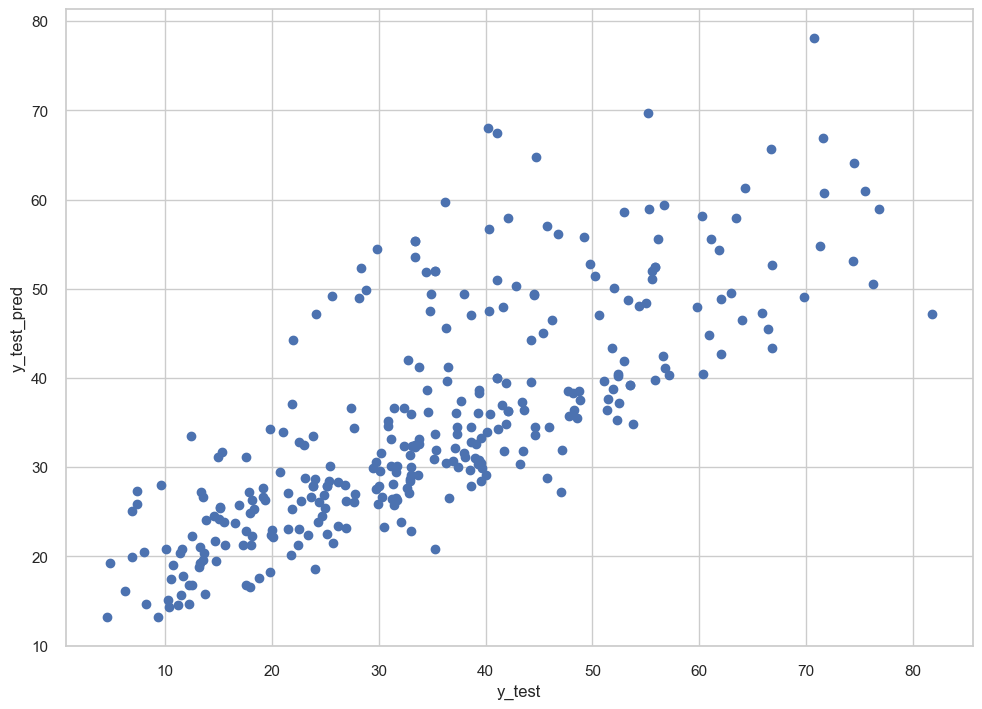

In [19]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Ridge

In [20]:
alpha = 0.1
ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
yridge = ridge.predict(X_train_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, yridge))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, yridge))

# model evaluation for testing set
y_test_pred = ridge.predict(X_test_scaled)
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 107.27
Mean absolute error (MAE): 8.19
Mean Absolute Percentage Error (MAPE): 31.49
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 109.46
Mean absolute error (MAE): 8.31
Mean Absolute Percentage Error (MAPE): 32.29


In [21]:
alphas = np.logspace(-5,3,100)

ridge_mse_train  = []
ridge_mse_test = []
ridge_mae_train = []
ridge_mae_test = []
ridge_mape_train = []
ridge_mape_test = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    yridge_train = ridge.predict(X_train_scaled)
    yridge_test = ridge.predict(X_test_scaled)
    
    #Results
    ridge_mse_train.append(mean_squared_error(y_train, yridge_train))
    ridge_mse_test.append(mean_squared_error(y_test, yridge_test))
    ridge_mae_train.append(mean_absolute_error(y_train, yridge_train))
    ridge_mae_test.append(mean_absolute_error(y_test, yridge_test))
    ridge_mape_train.append(MAPE(y_train, yridge_train))
    ridge_mape_test.append(MAPE(y_test, yridge_test))

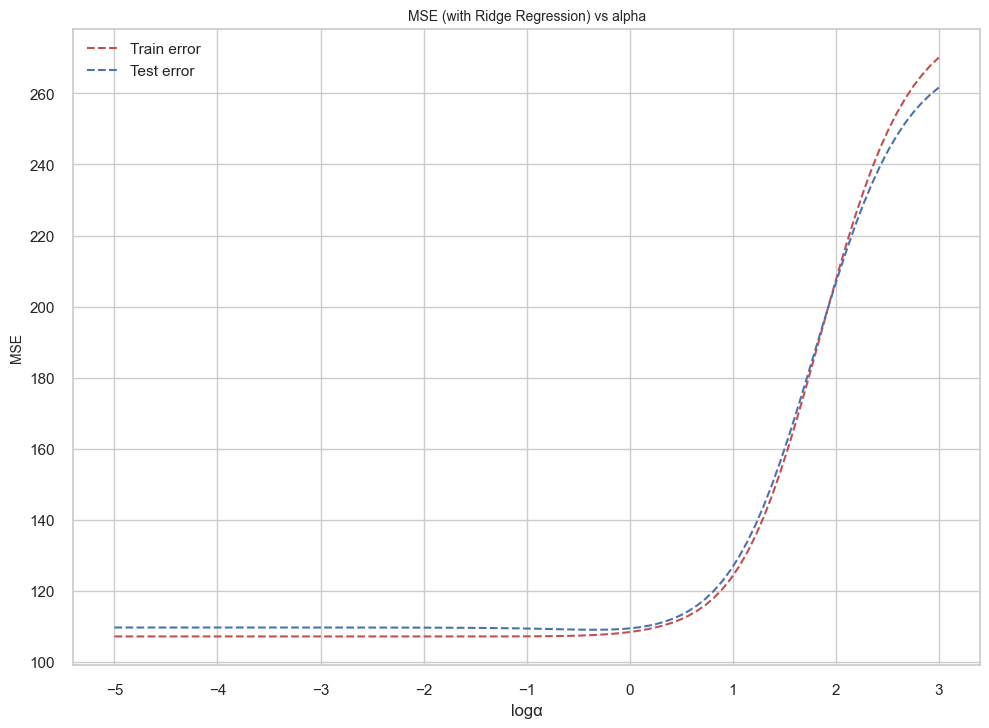

In [22]:
plot_train_test_errors_ridge(ridge_mse_train, ridge_mse_test, alphas)

# LASSO

In [23]:
alpha = 0.01

lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=alpha)
lasso.fit(X_train_scaled, y_train)
ylasso = lasso.predict(X_train_scaled)

print("--------------------------------------")
print("The model performance for training set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_train, ylasso))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_train, ylasso))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_train, ylasso))

# model evaluation for testing set
y_test_pred = lasso.predict(X_test_scaled)
print("--------------------------------------")
print("The model performance for testing set")
print("--------------------------------------")
# The mean squared error                               
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean absolute error (MAE): %.2f' % mean_absolute_error(y_test, y_test_pred))
# Mean absolute error                                                           
print('Mean Absolute Percentage Error (MAPE): %.2f' % MAPE(y_test, y_test_pred))

--------------------------------------
The model performance for training set
--------------------------------------
Mean squared error (MSE): 109.44
Mean absolute error (MAE): 8.34
Mean Absolute Percentage Error (MAPE): 32.66
--------------------------------------
The model performance for testing set
--------------------------------------
Mean squared error (MSE): 110.65
Mean absolute error (MAE): 8.48
Mean Absolute Percentage Error (MAPE): 33.68


In [24]:
alphas = np.logspace(-5,3,100)

lasso_mse_train  = []
lasso_mse_test = []
lasso_mae_train = []
lasso_mae_test = []
lasso_mape_train = []
lasso_mape_test = []

for alpha in alphas:
    lasso = Lasso(max_iter = 10000, normalize = True)
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    ylasso_train = lasso.predict(X_train_scaled)
    ylasso_test = lasso.predict(X_test_scaled)

    #Results
    lasso_mse_train.append(mean_squared_error(y_train, ylasso_train))
    lasso_mse_test.append(mean_squared_error(y_test, ylasso_test))
    lasso_mae_train.append(mean_absolute_error(y_train, ylasso_train))
    lasso_mae_test.append(mean_absolute_error(y_test, ylasso_test))
    lasso_mape_train.append(MAPE(y_train, ylasso_train))
    lasso_mape_test.append(MAPE(y_test, ylasso_test))

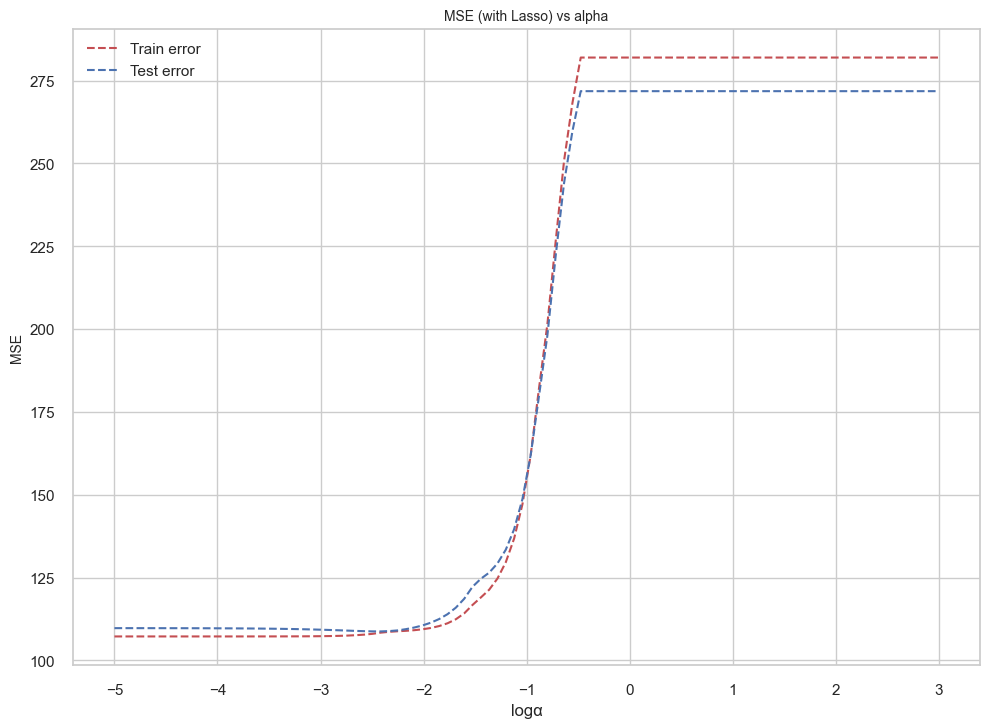

In [25]:
plot_train_test_errors_lasso(lasso_mse_train, lasso_mse_test, alphas)

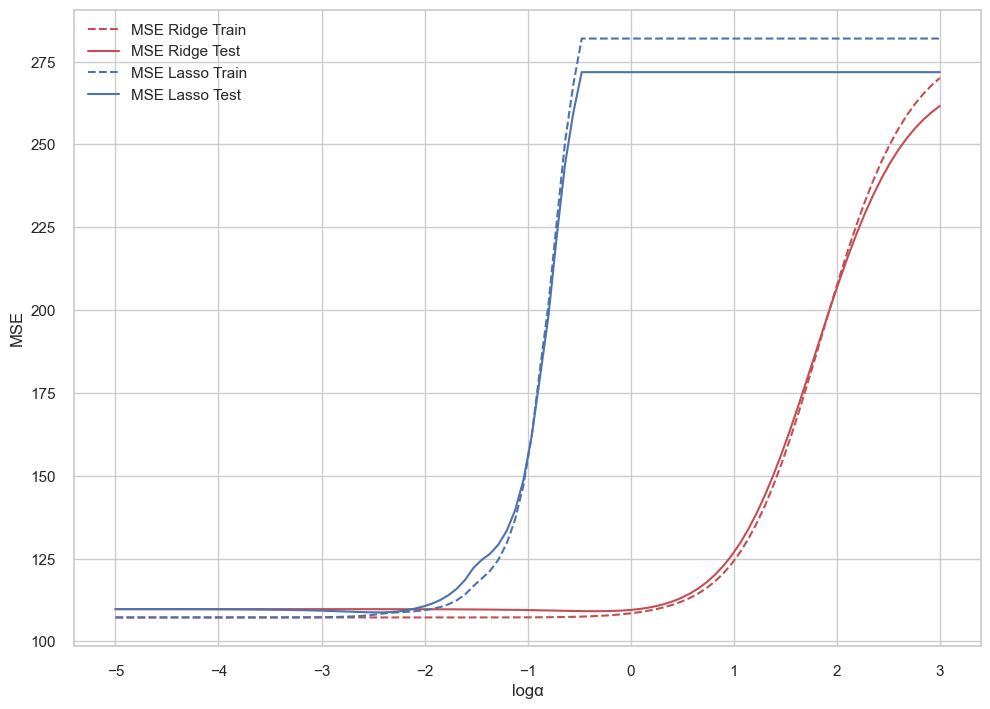

In [56]:
plt.figure()
plt.plot(np.log10(alphas), ridge_mse_train, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(alphas), ridge_mse_test, 'r', label = 'MSE Ridge Test')
plt.plot(np.log10(alphas), lasso_mse_train, 'b--', label = 'MSE Lasso Train')
plt.plot(np.log10(alphas), lasso_mse_test, 'b', label = 'MSE Lasso Test')
plt.xlabel('logα')
plt.ylabel('MSE')
plt.legend()
plt.savefig("visualizations/MSE_train_test_Ridge_Lasso.png",bbox_inches='tight')
plt.show()

-------------
# Implement K fold Cross-Validation in Scikit-Learn
-----------------
K-fold cross-validation is a superior technique to validate the performance of our model. It evaluates the model using different chunks of the data set as the validation set. We divide our data set into K-folds. K represents the number of folds into which you want to split your data. If we use 5-folds, the data set divides into five sections. In different iterations, one part becomes the validation set.
https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/ (A nice picture explaining it)

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates each model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [27]:
mae = make_scorer(mean_absolute_error)
mape = make_scorer(MAPE)

scoring = {'mse': 'neg_mean_squared_error', 'mae':mae, 'mape':mape}

In [28]:
def display_result(result):
    #print("MSE: ",result['test_mse'])
    print("mean MSE: ",-result['test_mse'].mean())
    #print("MAE: ",result['test_mae'])
    print("mean MAE: ",result['test_mae'].mean())
    #print("MAPE: ",result['test_mape'])
    print("mean MAPE: ",result['test_mape'].mean())

In [29]:
ols = LinearRegression()

scores = cross_validate(ols, X_train_scaled, y_train, cv=10, scoring=scoring)
print("--------------------------------------")
print("Linear Regression - cv")
print("--------------------------------------")
display_result(scores)

--------------------------------------
Linear Regression - cv
--------------------------------------
mean MSE:  112.03720283889717
mean MAE:  8.322305400818898
mean MAPE:  31.841852132776644


In [30]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

scores = cross_validate(ridge, X_train_scaled, y_train, cv=10, scoring=scoring)
print("--------------------------------------")
print("Ridge Regression - cv")
print("--------------------------------------")
display_result(scores)

--------------------------------------
Ridge Regression - cv
--------------------------------------
mean MSE:  112.02832067930805
mean MAE:  8.323562029915228
mean MAPE:  31.853541029756865


In [31]:
alpha = 0.01
lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=alpha)

scores = cross_validate(lasso, X_train_scaled, y_train, cv=10, scoring=scoring)
print("--------------------------------------")
print("Lasso Regression - cv")
print("--------------------------------------")
display_result(scores)

--------------------------------------
Lasso Regression - cv
--------------------------------------
mean MSE:  113.49762314949953
mean MAE:  8.46413993517602
mean MAPE:  33.00024155685449


In [32]:
#define parameters
param = {'alpha':[.0001, 0.001,0.01, 0.01,1, 10, 100]}
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [33]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train_scaled, y_train)

# summarize result
print("--------------------------------------")
print("Ridge")
print("--------------------------------------")
print('Best MSE: %s' % -result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

--------------------------------------
Ridge
--------------------------------------
Best MSE: 110.7006369882332
Best Hyperparameters: {'alpha': 0.01}


In [34]:
#define model
model = Lasso()

# define search
search = GridSearchCV(model, param, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train_scaled, y_train)

# summarize result
print("--------------------------------------")
print("Lasso")
print("--------------------------------------")
print('Best MSE: %s' % -result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

--------------------------------------
Lasso
--------------------------------------
Best MSE: 110.70747534931421
Best Hyperparameters: {'alpha': 0.0001}


# Polynomial regression

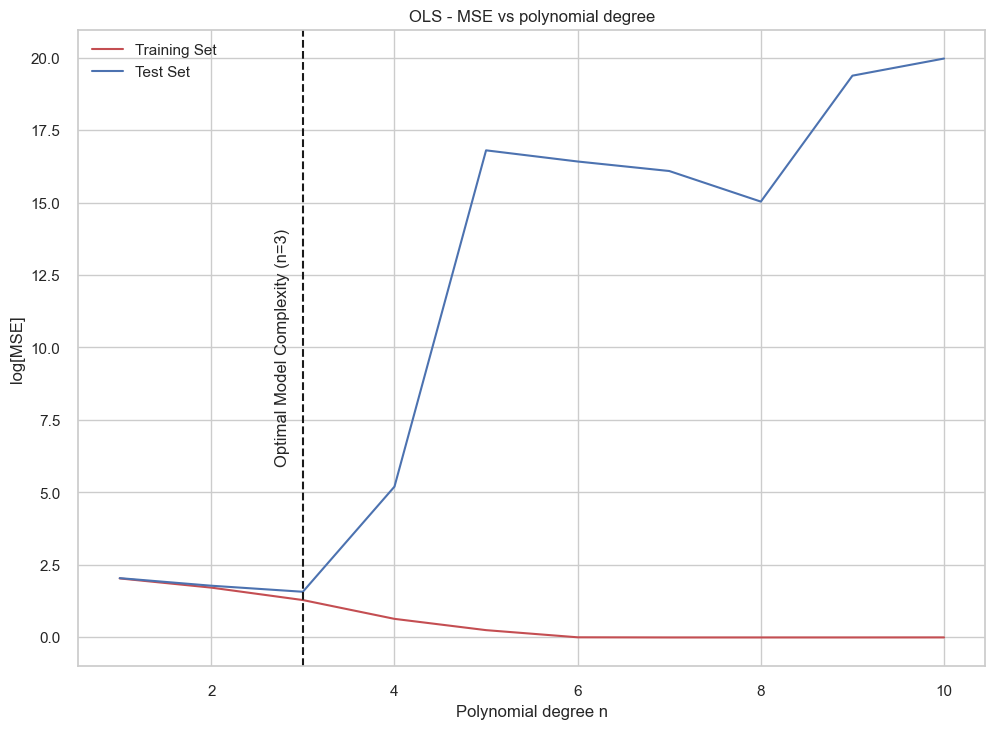

In [57]:
degrees = list(range(1,11))
mse_train = []
mse_test = []

for degree in degrees:
    #Creates a polynomial regression model for the given degree
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test_scaled))
  
    # evaluating the model on training dataset
    #mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_train.append(mean_squared_error(y_train, y_train_predicted))

    # evaluating the model on test dataset
    #mse_test = mean_squared_error(y_test, y_test_predict)
    mse_test.append(mean_squared_error(y_test, y_test_predict))
    
plt.plot(degrees, np.log10(mse_train), 'r', label='Training Set')
plt.plot(degrees, np.log10(mse_test), 'b', label='Test Set')
plt.axvline(x = 3, color='k', linestyle='--')
plt.text(2.7, 6, 'Optimal Model Complexity (n=3)', rotation = 90)
plt.xlabel('Polynomial degree n')
plt.ylabel('log[MSE]')
plt.title('OLS - MSE vs polynomial degree')
plt.legend()
plt.savefig("visualizations/polynomial_regression.png",bbox_inches='tight')
plt.show()